In [1]:
import torch
from torch.utils.data import Dataset
from torch import nn
import glob
import numpy as np
import os
from PIL import Image, ImageDraw
from torchvision import transforms as T
import cv2
import torch.nn.functional as F
from torchvision import models
from ray_sample import *
from depth_utils import load_colmap_depth
from matplotlib import pyplot as plt

In [13]:
a=torch.randn((1,3,256,128))
a[:,:,:48,:16]=0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


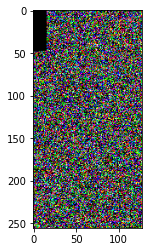

In [14]:
plt.imshow(a[0].permute(1,2,0))

2

In [15]:
sampler = FlexGridRaySampler(32,img_wh=(256,128))
selected_idcs, pixels_i = sampler(idx=0)
outputs = []
item = torch.nn.functional.grid_sample(a, pixels_i.unsqueeze(0), mode='bilinear', align_corners=True)[0]
item2 = a[selected_idcs]

IndexError: tensors used as indices must be long, byte or bool tensors

In [13]:
data_reflection=load_colmap_depth('../data/nerf_llff_data/trex/output/',(504,378),factor=1)
data_original=load_colmap_depth('../data/nerf_llff_data/trex/original/',(504,378),factor=1)

Mean Projection Error: 0.6902237341510813
Loaded image data (756, 1008, 3, 6) [ 756.         1008.          826.15317626]
near/far: 1.2 49.721482310959665
Mean Projection Error: 0.712586644416433
Loaded image data (756, 1008, 3, 6) [ 756.         1008.          833.50493057]
near/far: 1.2 22.63758789083521


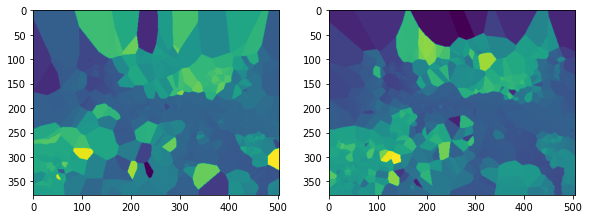

In [24]:
plt.subplots(figsize=(15, 8))
plt.subplot(131)
plt.imshow(data_reflection[0])
plt.subplot(132)
plt.imshow(data_original[0])
# plt.subplot(133)
# plt.imshow((data_reflection-data_original)[0],cmap='gray')